In [1]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
import os

data_dir = "../Russian_WildLife_Dataset"

class_mapping = {
    'amur_leopard': 0,
    'amur_tiger': 1,
    'birds': 2,
    'black_bear': 3,
    'brown_bear': 4,
    'dog': 5,
    'roe_deer': 6,
    'sika_deer': 7,
    'wild_boar': 8,
    'people': 9
}

# Using a dictionary comprehension to reverse the key-value pairs
reverse_class_mapping = {v: k for k, v in class_mapping.items()}

image_size = 1024
transform = transforms.Compose([
    transforms.Resize(image_size),  # Resize images to have the maximum side length of 256 pixels
    transforms.CenterCrop(image_size),  # Crop the center 256x256 region
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])

# Create dataset using ImageFolder
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Number of images

In [2]:
# Number of Images
num_images = len(dataset)
print("Number of Images:", num_images)

Number of Images: 12825


## Distribution of classes

In [3]:
from collections import Counter

# Create an instance of the custom dataset
custom_dataset = RussianWildlifeDataset(root_dir=data_dir, transform=None)

# Get class distribution
class_counts = Counter(custom_dataset.dataset.targets)
print("Class Distribution:")
for class_idx, count in class_counts.items():
    print(f"Class {class_idx}: {count} images")

NameError: name 'RussianWildlifeDataset' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


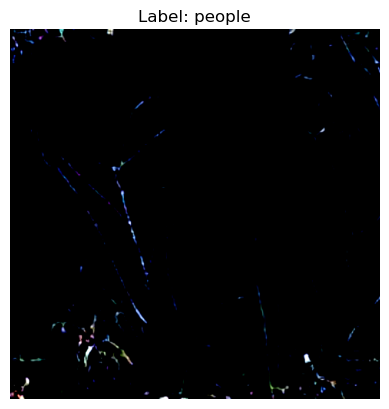

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


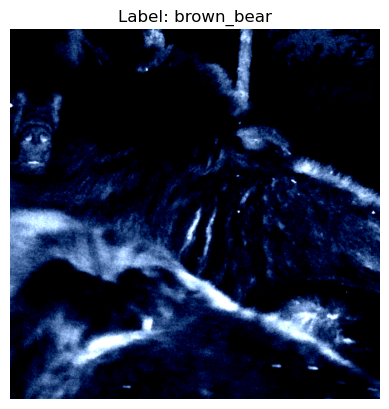

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


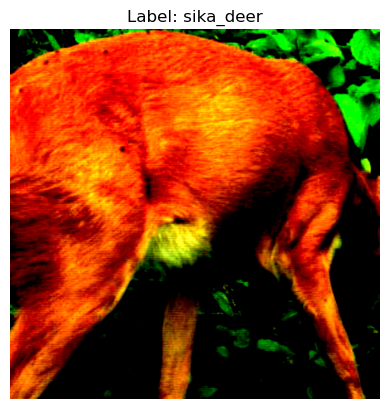

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


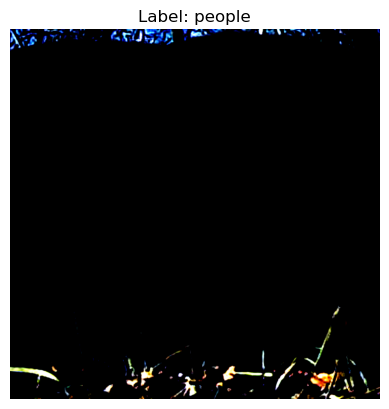

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


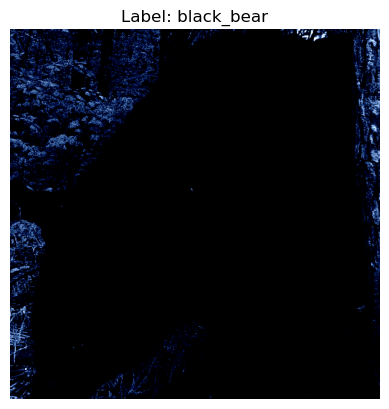

In [24]:
def display_random_images(dataset, num_images=1):
    for _ in range(num_images):
        # Get a random index
        random_index = random.randint(0, len(dataset) - 1)

        # Access the image and its label
        image, label = dataset[random_index]

        # Display the image and its label
        plt.imshow(image.permute(1, 2, 0))
        plt.title(f"Label: {reverse_class_mapping[label]}")
        plt.axis('off')
        plt.show()

# Specify the number of random images to display
num_random_images = 5  # Change this variable to display a different number of random images
display_random_images(dataset, num_random_images)

## Custom Data Class

In [39]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from torchvision.datasets import ImageFolder

class AnimalData(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.dataset = ImageFolder(root=self.data_dir, transform=self.transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx]

# Define the parameters
data_dir = "../Russian_WildLife_Dataset"

class_mapping = {
    'amur_leopard': 0,
    'amur_tiger': 1,
    'birds': 2,
    'black_bear': 3,
    'brown_bear': 4,
    'dog': 5,
    'roe_deer': 6,
    'sika_deer': 7,
    'wild_boar': 8,
    'people': 9
}

# Using a dictionary comprehension to reverse the key-value pairs
reverse_class_mapping = {v: k for k, v in class_mapping.items()}

image_size = 1024
transform = transforms.Compose([
    transforms.Resize(image_size),  # Resize images to have the maximum side length of 1024 pixels
    transforms.CenterCrop(image_size),  # Crop the center 1024x1024 region
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])

# Create dataset using AnimalData
animal_data = AnimalData(data_dir=data_dir, transform=transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


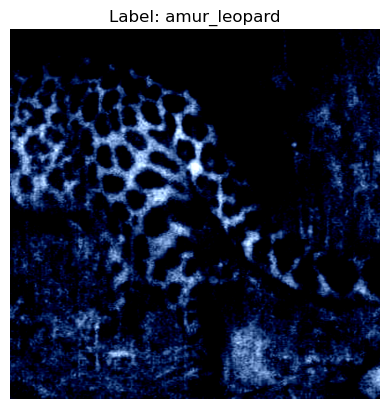

In [43]:
import matplotlib.pyplot as plt

# Access the 5th image in animal_data
image, label = animal_data[400]

# Convert the image tensor to a NumPy array and transpose it to the correct shape for displaying
image_np = image.permute(1, 2, 0).numpy()

# Display the image
plt.imshow(image_np)
plt.title(f"Label: {reverse_class_mapping[label]}")
plt.axis('off')
plt.show()


# Split the data now 

In [ ]:
from sklearn.model_selection import train_test_split

# Extract images and labels from the AnimalData instance
images = [image for image, _ in animal_data]
labels = [label for _, label in animal_data]

# Split the data into train and temp sets (70% train, 30% temp)
train_images, temp_images, train_labels, temp_labels = train_test_split(images, labels, test_size=0.3, stratify=labels, random_state=42)

# Split the temp data into validation and test sets (10% validation, 20% test)
validation_images, test_images, validation_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.67, stratify=temp_labels, random_state=42)

# Print the sizes of each set
print("Train set size:", len(train_images))
print("Validation set size:", len(validation_images))
print("Test set size:", len(test_images))